<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.542793  53.333570  83.351238  0.359214  215.586815   
      1.0    74.567486  46.441789  29.436098  0.110238  160.555611   
      2.0    62.613577  77.383451  89.448904 -0.242027  239.203905   
      3.0    38.824319  21.357612  26.691584 -0.616457   96.257058   
      4.0    47.011889  63.560654  41.162665  0.033977  161.769186   
...                ...        ...        ...       ...         ...   
999.0 115.0  49.741492  26.901965  23.479184  0.300978  110.423618   
      116.0  50.365120  79.600300  96.035975 -0.633779  235.367616   
      117.0  89.627175  92.136316  31.098389  0.175626  223.037507   
      118.0  43.919718  81.382449  67.407206  0.204796  202.914169   
      119.0  93.295659  63.110978  58.264138  0.270845  224.941620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    215.321525  0.265290  
      1.0    160.482213  0.073398  
      2.0    239.484785 -0.280880  
      3.0     97.158583 -0.901525  
      4.0    161.844551 -0.075366  
...                 ...       ...  
999.0 115.0  109.940421  0.483197  
      116.0  235.983619 -0.616003  
      117.0  222.739618  0.297889  
      118.0  202.678586  0.235583  
      119.0  224.514783  0.426837  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.542793  53.333570  83.351238  0.359214  215.586815   
      1.0    74.567486  46.441789  29.436098  0.110238  160.555611   
      2.0    62.613577  77.383451  89.448904 -0.242027  239.203905   
      3.0    38.824319  21.357612  26.691584 -0.616457   96.257058   
      4.0    47.011889  63.560654  41.162665  0.033977  161.769186   
...                ...        ...        ...       ...         ...   
999.0 115.0  49.741492  26.901965  23.479184  0.300978  110.423618   
      116.0  50.365120  79.600300  96.035975 -0.633779  235.367616   
      117.0  89.627175  92.136316  31.098389  0.175626  223.037507   
      118.0  43.919718  81.382449  67.407206  0.204796  202.914169   
      119.0  93.295659  63.110978  58.264138  0.270845  224.941620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    215.321525  0.265290  
      1.0    160.482213  0.073398  
      2.0    239.484785 -0.280880  
      3.0     97.158583 -0.901525  
      4.0    161.844551 -0.075366  
...                 ...       ...  
999.0 115.0  109.940421  0.483197  
      116.0  235.983619 -0.616003  
      117.0  222.739618  0.297889  
      118.0  202.678586  0.235583  
      119.0  224.514783  0.426837  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.542793  53.333570  83.351238  0.359214  215.586815   
      1.0    74.567486  46.441789  29.436098  0.110238  160.555611   
      2.0    62.613577  77.383451  89.448904 -0.242027  239.203905   
      3.0    38.824319  21.357612  26.691584 -0.616457   96.257058   
      4.0    47.011889  63.560654  41.162665  0.033977  161.769186   
...                ...        ...        ...       ...         ...   
999.0 115.0  49.741492  26.901965  23.479184  0.300978  110.423618   
      116.0  50.365120  79.600300  96.035975 -0.633779  235.367616   
      117.0  89.627175  92.136316  31.098389  0.175626  223.037507   
      118.0  43.919718  81.382449  67.407206  0.204796  202.914169   
      119.0  93.295659  63.110978  58.264138  0.270845  224.941620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    215.321525  0.265290  
      1.0    160.482213  0.073398  
      2.0    239.484785 -0.280880  
      3.0     97.158583 -0.901525  
      4.0    161.844551 -0.075366  
...                 ...       ...  
999.0 115.0  109.940421  0.483197  
      116.0  235.983619 -0.616003  
      117.0  222.739618  0.297889  
      118.0  202.678586  0.235583  
      119.0  224.514783  0.426837  

[120000 rows x 7 columns]

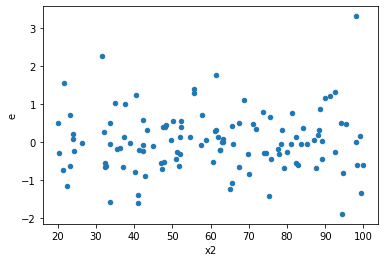

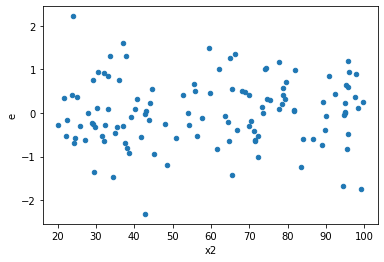

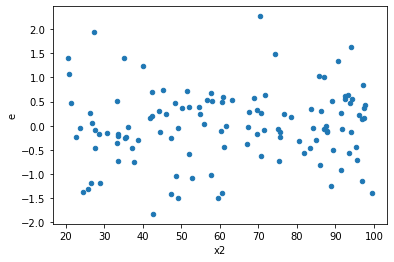

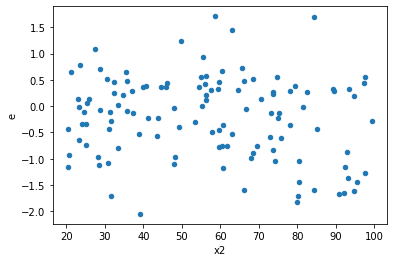

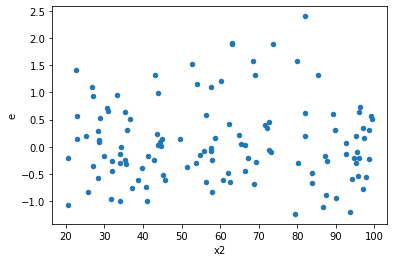

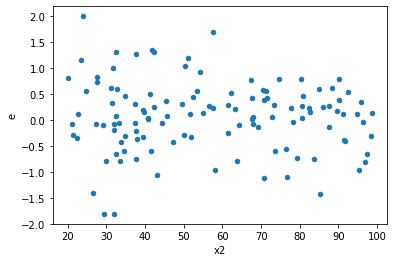

In [16]:
tablenew0 = table.loc[1.0]
tablenew1 = table.loc[50.0]
tablenew2 = table.loc[135.0]
tablenew3 = table.loc[212.0]
tablenew4 = table.loc[248.0]
tablenew5 = table.loc[345.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,21.76423014865128,24.40447219326806,0.4836495588589173,0.5423216042948458,1.1213110698877808,0.7026031442182383,0.6486984278908808,0.35130157210911916,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,16.917428015815617,25.38535271720367,0.37594284479590256,0.5641189492711927,1.5005444499880027,0.17731393361927394,0.911343033190363,0.08865696680963697,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,20.724672542640747,33.61137699709241,0.4605482787253499,0.7469194888242757,1.6218049731756887,0.10846171424959117,0.9457691428752044,0.054230857124795584,Reject001=1 : Homoscedasticity
9.0,45.0,45.0,18.95560052657155,28.936854384909566,0.42123556725714556,0.643041208553546,1.5265596225425047,0.15978285788260038,0.9201085710586998,0.07989142894130019,Reject001=1 : Homoscedasticity
11.0,45.0,45.0,23.14115375109875,29.00035267415504,0.5142478611355278,0.6444522816478897,1.2531938980258532,0.45203921337660535,0.7739803933116973,0.22601960668830268,Reject001=1 : Homoscedasticity
13.0,45.0,45.0,19.176455552144915,32.38543483386395,0.42614345671433146,0.719676329641421,1.6888123431257132,0.082192218647406,0.958903890676297,0.041096109323703,Reject001=1 : Homoscedasticity
14.0,45.0,45.0,18.16355787624552,22.71989498144699,0.40363461947212265,0.5048865551432665,1.2508504741331707,0.4557906132167846,0.7721046933916077,0.2278953066083923,Reject001=1 : Homoscedasticity
16.0,45.0,45.0,17.98368959147206,31.018098133390136,0.3996375464771569,0.6892910696308919,1.7247905651184643,0.07073073713061584,0.9646346314346921,0.03536536856530792,Reject001=1 : Homoscedasticity
18.0,45.0,45.0,15.304081363697643,22.467630457496877,0.3400906969710587,0.49928067683326394,1.4680809598145288,0.20166776364463912,0.8991661181776804,0.10083388182231956,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,21.76423014865128,24.40447219326806,0.4836495588589173,0.5423216042948458,1.1213110698877808,0.7026031442182383,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,39.78655721344461,14.72801289171753,0.8841457158543247,0.32728917537150065,0.3701756051096741,0.001152124557833604,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,22.48960145758025,22.35718220880353,0.49976892127956113,0.4968262713067451,0.9941119788615869,0.9842845633342593,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,16.917428015815617,25.38535271720367,0.37594284479590256,0.5641189492711927,1.5005444499880027,0.17731393361927394,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,23.213778520897286,21.78129968054608,0.5158617449088285,0.4840288817899129,0.9382918709652687,0.8317672479734769,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,28.797554944165455,25.7378314201369,0.639945665425899,0.5719518093363756,0.8937505795210412,0.7079755617111806,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,20.724672542640747,33.61137699709241,0.4605482787253499,0.7469194888242757,1.6218049731756887,0.10846171424959117,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,19.01094596171568,17.127542921434944,0.422465465815904,0.38061206492077654,0.9009305983998093,0.7279102662423153,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,27.379999316145245,15.05466772367974,0.6084444292476721,0.3345481716373276,0.549841785963903,0.04764043370787567,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      981
Reject001=0 : Heteroscedasticity     19
Name: Result_test, dtype: int64